PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much variance as possible. It is used to simplify data, reduce noise, and extract important features.


### PCA is used for:

1)Reducing dimensionality: It reduces the number of variables in a dataset while retaining important information.
2)Removing noise: By focusing on the components with the most variance, PCA helps eliminate noise from data.
3)Improving model performance: Reducing dimensions can prevent overfitting and improve model generalization.

### -------------------------------------------
Eigenvalues represent the amount of variance captured by each principal component. 

Eigenvectors define the direction of the new feature space (principal components).




### What is the difference between PCA and LDA?

PCA (Principal Component Analysis) focuses on maximizing variance and is unsupervised.

LDA (Linear Discriminant Analysis) focuses on maximizing the separation between different classes and is supervised.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('Wine.csv')

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [6]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
Customer_Segment          int64
dtype: object

In [8]:
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

Alcohol - 126
Malic_Acid - 133
Ash - 79
Ash_Alcanity - 63
Magnesium - 53
Total_Phenols - 97
Flavanoids - 132
Nonflavanoid_Phenols - 39
Proanthocyanins - 101
Color_Intensity - 132
Hue - 78
OD280 - 122
Proline - 121
Customer_Segment - 3


In [9]:
df.shape

(178, 14)

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64


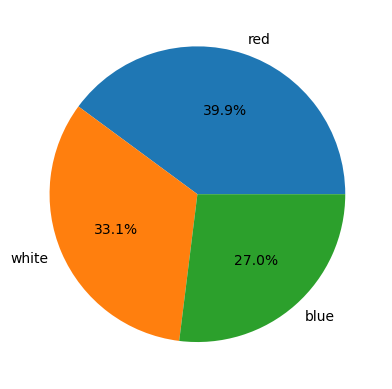

In [10]:
output=df['Customer_Segment'].value_counts()
print(output)

# output.plot(kind='pie',labels=['red', 'white', 'blue'],autopct='%1.1f%%')
plt.pie(output, labels=['red', 'white', 'blue'], autopct='%1.1f%%' )
plt.show()
# sns.countplot(x=df['Customer_Segment'],hue=df['Customer_Segment'])

In [11]:
x=df.iloc[:,:13]
y=df.iloc[:,13]

In [12]:
sc=StandardScaler()

x_stand=sc.fit_transform(x)

In [13]:
x_stand[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

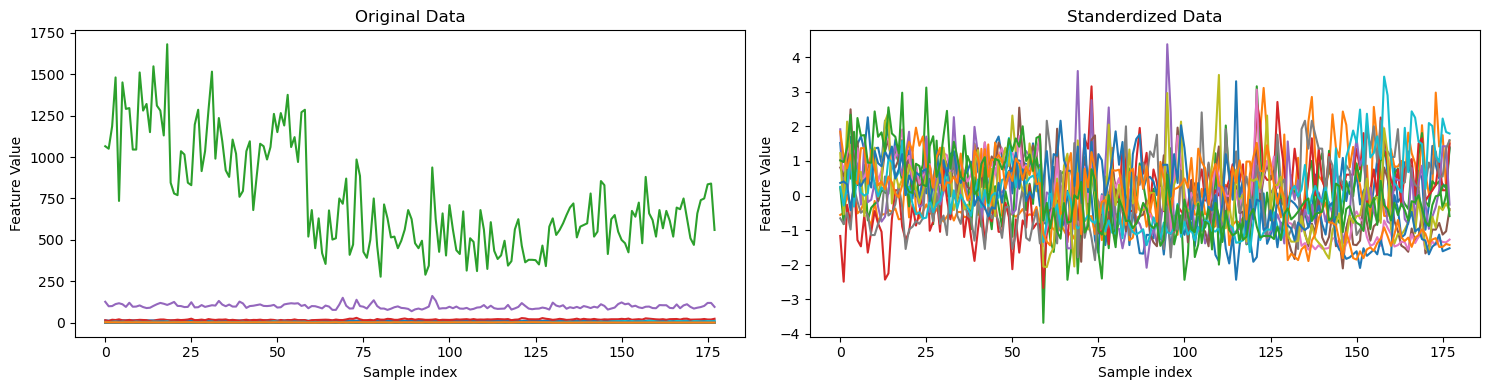

In [14]:
fig, axes =plt.subplots(nrows=1,ncols=2, figsize=(15,4))

axes[0].plot(x)
axes[1].plot(x_stand)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Sample index')
axes[0].set_ylabel('Feature Value')


axes[1].set_title('Standerdized Data')
axes[1].set_xlabel('Sample index')
axes[1].set_ylabel('Feature Value')

plt.tight_layout()
plt.show()

<Axes: xlabel='Customer_Segment', ylabel='count'>

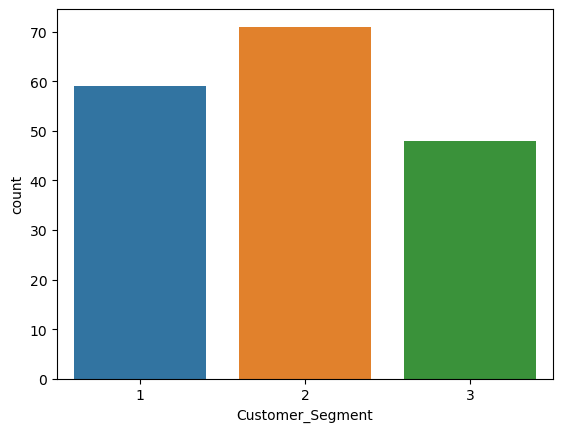

In [15]:
df['Customer_Segment'] = df['Customer_Segment'].astype(str)
sns.countplot(x='Customer_Segment',data=df,hue='Customer_Segment')

In [16]:
pca=PCA(n_components=6)
x_pca=pca.fit_transform(x_stand)

In [17]:
df_pca=pd.DataFrame(data=x_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
df_pca['target']=y

In [18]:
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,target
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,1
...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,3
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,3
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,3
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,3


In [19]:
eigenvalues = pca.explained_variance_

print("Eigenvalues:", eigenvalues)

Eigenvalues: [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221]


In [20]:
eigenvectors = pca.components_

print("\nEigenvectors:\n\n", eigenvectors)


Eigenvectors:

 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [ 0.48365155  0.22493093  0.31606881 -0.0105905   0.299634    0.06503951
  -0.00335981  0.02877949  0.03930172  0.52999567 -0.27923515 -0.16449619
   0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]
 [-0.0178563   0.53689028 -0.21417556  0.06085941 -0.35179658  0.19806835
   0.15229479 -0.20330102  0.39905653  0.06592568 -0.42777141  0.18412074
  -0.23207086]
 [-0.26566365  0.03521363 -0.14302547  0.06610294  0.72704851 -0.14931841
  -0.10902584 -0.50070298  0.13685982 -0.07643678 -0.17361452 -0.10116099
  -0.1578688 ]
 [ 0.21353865  0.53681385  0.15447466 -0.10082451  0.03814394 -0.0841223
  -0.01892002 -0.25859401 -0.53379539 -0.41864414  0.10598274  0.26585107
   0.11972557]]


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.25,random_state=42)

In [22]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [23]:
print(f"Accuracy score :{accuracy_score(y_test,y_pred)*100} %")

Accuracy score :97.77777777777777 %


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
# cm = confusion_matrix(y_test, y_pred)

# # Print confusion matrix
# print("Confusion Matrix:")
# print(cm)

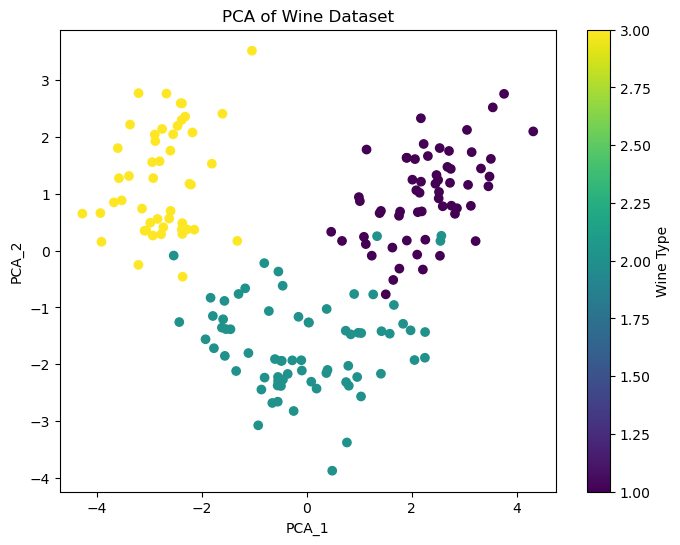

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=df_pca["target"], cmap='viridis')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('PCA of Wine Dataset')
plt.colorbar(label='Wine Type')
plt.show()